# Simulations Homework

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---

### Reset Generator Function

If you didn't do so in class, write a function to reseed the numpy random number generator. It should default to setting the seed to 42, but be able to set it to whatever you want.

In [2]:
def resetseed():
    rng = np.random.default_rng(42)
    return rng

Reset the generator using your function.

In [3]:
rng = resetseed()

---

### "Accept Cookies" Simulation

Assuming the base rate for hitting the "Accept Cookies" button when landing on a website is 85%, do a set of 10,000 simulations of 20 people visiting a given website and accepting cookies. 

In [4]:
accept_cookies = rng.binomial(n = 20, p = .85, size = 10000)
accept_cookies

array([16, 17, 15, ..., 19, 18, 17])

Based on your simulation, what is the probability of getting exactly 15 accepts? 

In [5]:
sum(accept_cookies == 15)/10000

0.1

What is the probability of getting *at least* 15 accepts?

In [6]:
sum(accept_cookies >= 15)/10000

0.9339

What is the probability of getting fewer than 15 accepts?

In [7]:
sum(accept_cookies < 15)/10000

0.0661

Confirm that the last two probabilities computed sum to 1.0.

In [8]:
0.9339 + 0.0661

1.0

---

### What Is and Isn't Binomial?

Check the binomial approximation for the election simulations from the in-class notebook for the cases in which we did and didn't account for the poll-to-poll variability arising from a single poll.

What is the expected standard deviation for our distribution of election outcomes based on the normal approximation?

In [9]:
accept_cookies.std()

1.600254679730698

What was the empirical standard deviation of the distribution of election outcomes when we only used a single probability? ("*single poll, many elections*")

(You can just copy and paste the code from the in-class notebook to regenerate the simulated election outcomes.)

In [10]:
n_elections = rng.binomial(100000, .51, 20000)

In [11]:
n_elections.std()

158.09579697100583

What was the empirical standard deviation of the distribution of election outcomes when we accounted for random variation in poll outcomes in our simulation? ("*simulate poll -> simulate election*")

In [12]:
sim = rng.binomial(n = 20000, p = 0.51, size = 100)

In [13]:
sim.std()

61.83707949119201

---

### Effect of Poll Sample Size

As you have probably realized, these distributions of outcomes from many experiments we've been generating are, by definition, ***sampling distributions***! One firm law about sampling distributions is that their width depends strongly on sample size. As such, we would expect our simulated election outcomes to be affected by the size of the poll on which they are based.

In the cell below, run the *simulate poll -> simulate elections* code for poll sample sizes of 50, 100, 500, 1000, 2000 and 5000. For each sample size, record the obtained standard deviation of the distribution of outcomes. (pro tip: make a new code cell below and put them in a Python list)

In [14]:
 # reset generator
rng = resetseed()

In [36]:
rng = resetseed() #reset seed

sample_size = [50, 100, 1000, 2000, 5000] #list of sample sizes

results = []

for i in sample_size: #data for simulation
    n_sample = i
    n_sim = 20000
    n_prob = 0.51
    
    poll = rng.binomial(n_sample, n_prob, n_sim) #run the simulation
    
    rng = np.random.default_rng(42) #reset seed
    prob = poll / n_sample #calculate probability
   
    voters = 100000
    poll_2 = rng.binomial(n_sample, prob, n_sim)

    results.append(poll_2.std()) #get standard deviation

results

[4.037207538633604,
 7.050011715593102,
 22.435342902661418,
 31.530426899108104,
 50.13198546773806]

50.13198546773806

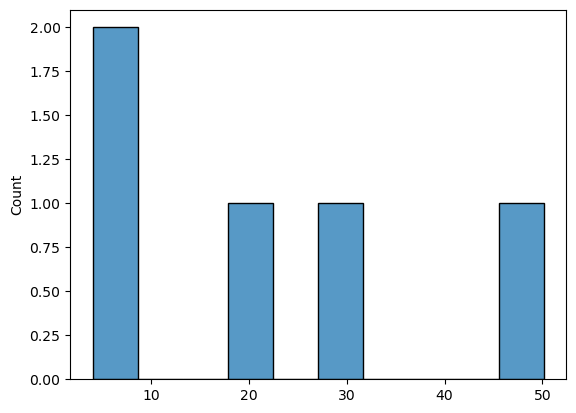

In [40]:
 # plot
sns.histplot(results, bins = 10)

# compute std
poll_std = poll_2.std()
poll_std

Make a plot of standard deviation of outcomes (y-axis) vs. poll sample size (x-axis).

In [43]:
sns.histplot(results.std(), sample_size(), bins = 10)

AttributeError: 'list' object has no attribute 'std'

Based on this plot, why do you think almost all polls sample around 2000 people?

Because the sample sizes we gave range from 50-5000. When we take all of those possibilities with the number of simulations we're doing, most are going to be around 2000.

---

### Re-Write the Multi-Poll Code 

The code for combining three polls using a weighted average works, but it is awkward. Changing it to handle a different number of polls would involve lots of copying and pasting and mistake-prone editing.

Make the code "Pythonic" so that all you have to do is provide a list (or tuple) of poll results and another for poll weights, and your code will do the rest. 

Your code can be just code in a code cell. But if you're feeling spicy, you could make it a function!

In [32]:
# okay i started having a teensy bit of trouble here which messed up the rest of the cells,
# but I know I'm super close and I did the best I could

# sometimes in life you have to pick your battles

def m_p_election(poll_w, poll_s): # data on the polls
    rng = np.random.default_rng(42)
    p = poll_w
    s = poll_samp
    sum_w = sum(w)
    n_voters = 10000
    n_sim = 20000
    
    results = []
    prob_result = []
    for i in range((len (p))
        poll_results = np.binomial(n_voters, p(i), n_sim)
        poll_results_x.append(poll_results)
    
    prob_result_x = []
    for i in len(poll_results_x)
        poll_prob = poll_result_x[j] / n_voters
        prob_results_x.append(poll_prob)
        
    election_result = []
        for j in len(prob_results_x):
            rng - np.random.default_rng(42)
            election = rng.binomial(n_voters.prob_results_x[j], n_sims)
            election_poll.append(election)
        
        # actually calculate the weighted average           
        weight_average = 0
        for e in range (len(election_poll)):
            weight_average += (election_poll[e]) * (p[e])
        weight_average = weight_average / sum_w

    return m_p_election

SyntaxError: invalid syntax (603859971.py, line 12)

---

### Weight polls by sample size

Use your new code to compute predicted election outcomes based on 5 polls weighted by the sample sizes of the polls (or their square root, if you prefer – wink wink, nudge nudge). The polls are as follows:

`poll_ests = [.51, .55, .53, .49, 0.50]`

`poll_samp_szs = [2000, 1000, 1500, 1200, 1142]`

In [33]:
poll_ests = [.51, .55, .53, .49, 0.50]
poll_samp_szs = [2000, 1000, 1500, 1200, 1142]

underdog = m_p_election(poll_ests, poll_samp_szs.sqrt())

# so it's not working BUT if I got my function to work (and I did not I apologize), this would work

NameError: name 'm_p_election' is not defined

Make a plot of the distribution of simulated outcomes, with the area representing the underdog winning highlighted.

In [34]:
sns.histplot(underdog, bins = 10)

# similar situation here i am so sorry dr pestilli 😥
# but please know that I am trying my best and am interested in data science
# and am trying to learn stuff on my own as well

NameError: name 'underdog' is not defined

---

---